In [1]:

import sys, os
sys.path.append(os.path.join(sys.path[0],'src'))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.api import API_AWS



In [11]:
# make first query and get path to output
api = API_AWS()
res_path = api.query_male_shoes_from_2012()


In [12]:
# load dataframe metadata
meta = api.load_meta_data(res_path)

In [4]:
meta.head()

,masterCategory,subCategory,gender,articleType,year,imagePath,usage,productDisplayName,season,id,baseColor
0,Footwear,Shoes,Men,Formal Shoes,2018,https://statis-s3-bucket.s3.us-east-1.amazonaw...,Formal,Red Tape Men's Black Formal Shoe,Winter,7372,Black
1,Footwear,Shoes,Men,Casual Shoes,2013,https://statis-s3-bucket.s3.us-east-1.amazonaw...,Casual,U.S. Polo Assn. Men Blue Boat Shoes,Spring,35671,Blue
2,Footwear,Shoes,Men,Casual Shoes,2018,https://statis-s3-bucket.s3.us-east-1.amazonaw...,Casual,Red Tape Men Brown Shoes,Winter,12513,Brown
3,Footwear,Shoes,Men,Casual Shoes,2013,https://statis-s3-bucket.s3.us-east-1.amazonaw...,Casual,Gas Men Sahar Casual Shoe,Summer,17057,Red
4,Footwear,Shoes,Men,Casual Shoes,2013,https://statis-s3-bucket.s3.us-east-1.amazonaw...,Casual,Gas Men Skate 003 Casual Shoe,Summer,17043,Black


In [13]:
meta.shape

(763, 11)

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

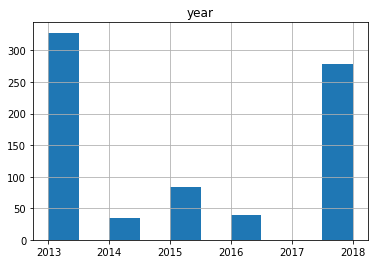

In [6]:
# histogram for year
meta.hist(column=['year'])

<AxesSubplot:>

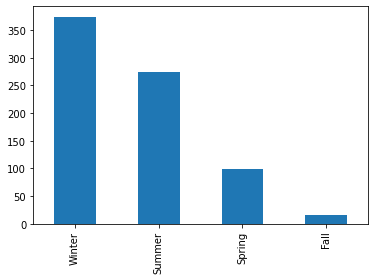

In [4]:
# season plot
meta.season.value_counts().plot.bar()

Empty DataFrame
Columns: [masterCategory, subCategory, gender, articleType, year, imagePath, usage, productDisplayName, season, id, baseColor]
Index: []
Empty DataFrame
Columns: [masterCategory, subCategory, gender, articleType, year, imagePath, usage, productDisplayName, season, id, baseColor]
Index: []
Empty DataFrame
Columns: [masterCategory, subCategory, gender, articleType, year, imagePath, usage, productDisplayName, season, id, baseColor]
Index: []


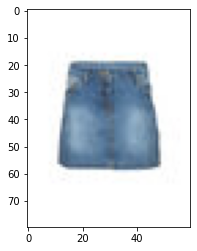

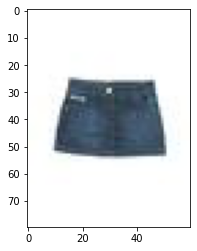

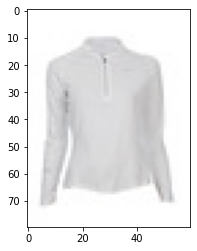

In [14]:
# show 10 random images from query
imgs = api.get_n_random_images(res_path, num_of_images=10)

for im, key in imgs:
    plt.figure()
    plt.imshow(np.asarray(im))
    print(meta.loc[meta['imagePath'] == key])